# Growing neural gas for the BOMNI Dataset

The input feature is obtained as follows:

    (1) perform mask-rcnn to derive person masks; for multiple persons, we use the annotated bounding box to select the correct one

    (2) resize the masks to 40X40
    
    (3) distance transform; the result is positive and the middle has the highest value

__1. import necessary libraries__

In [1]:
import mdp
import numpy as np
import os
import time

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.io as io

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


__2. define function to visualize segmentation result__

In [2]:
def plot_segmentation(labels):
    plt.plot(labels)
    plt.show()
    

def read_video_list(list_file_path):
    video_file = open(list_file_path,'r')
    video_list = []
    for line in video_file:
        video_list.append(line.strip())
    
    return video_list

__3. run the core part__

3.1 One should note that we need read out the feature vectors from prepared files.

3.2 The bnpy package support reading data from *.mat files.

-- processing: BOMNI_side-0
--- read data
--- train neural gas Gaussian expansions


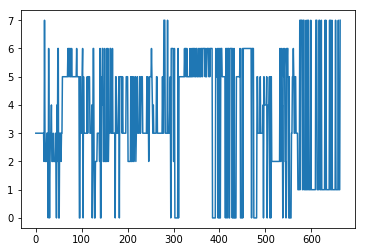

-- processing: BOMNI_side-1
--- read data
--- train neural gas Gaussian expansions


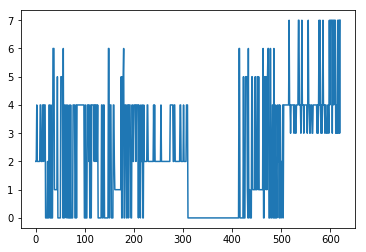

-- processing: BOMNI_side-2
--- read data
--- train neural gas Gaussian expansions


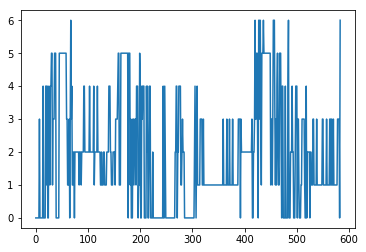

-- processing: BOMNI_side-3
--- read data
--- train neural gas Gaussian expansions


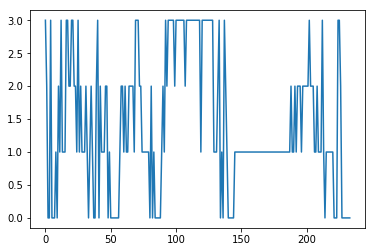

-- processing: BOMNI_side-4
--- read data
--- train neural gas Gaussian expansions


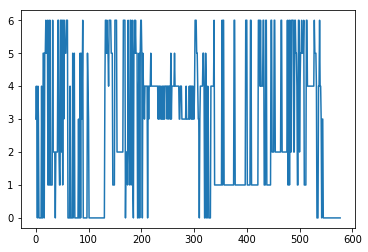

mean(runtime)=0.053330850601196286


In [4]:
feature_list = ['dist_mask']
dataset_path = '/home/yzhang/Videos/Dataset_BOMNI/scenario1/features'
result_path = '/home/yzhang/Videos/Dataset_BOMNI/scenario1/GNG_segmentation_results'
cpt_time = []
video_list = read_video_list('/home/yzhang/Videos/Dataset_BOMNI/scenario1/video_list2.txt')

for line in video_list:
    print ('-- processing: BOMNI_{:s}'.format(line))

    ## read the features from the file
    filename = '{:s}.mat'.format(line)
    print ('--- read data')
    dataset = io.loadmat(os.path.join(dataset_path,filename))
    X = dataset['X']
    
    
    ## train GNG Gaussian expansion
    ## train Growing Neural Gas Gaussian expansions
    gng = mdp.nodes.GrowingNeuralGasExpansionNode(max_nodes=100)
    print ('--- train neural gas Gaussian expansions')
    time_start = time.time()
    gng.train(X)
    gng.stop_training()
    Q = gng.execute(X) 

    ## measure running time
    eps = time.time()-time_start
    cpt_time = np.append(cpt_time, eps)

    ## assign labels to samples (0-based cluster)
    sample_labels = np.argmax(Q, axis=1)
    plot_segmentation(sample_labels)

    ## save the sample labels to file
    outfile = 'BOMNI_{:s}_GNG_SampleLabels.txt'.format(line)
    np.savetxt(os.path.join(result_path, outfile), sample_labels)

    ## save the encoded features to file
    outfile2 = 'BOMNI_{:s}_GNG_SampleEncoding.txt'.format(line)
    np.savetxt(os.path.join(result_path, outfile2), Q)
            
print ('mean(runtime)=' + str(np.mean(cpt_time)))

print dataset

In [16]:
print filename

side-0
.mat


['jointLocs', 'relativeAngle', 'quaternions']